# Air BnB Dataset: Exploratory Data Analysis

이 노트북에서는 캐글의 Air BnB 데이터 셋을 분석할 것이다.

이 Air BnB 경진대회의 목적은 기존 고객 데이터를 분석해 New 유저의 처음 여행지를 예측하는 것이다.

나는 여기서 몇가지 탐사 분석을 진행할 것이다.

알고싶은 것들
- 시계열 데이터가 의미하는 것
- AIr BnB 고객들의 특성 

In [1]:
%matplotlib inline
import datetime, time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv",index_col="id",parse_dates=["date_account_created","timestamp_first_active"])

In [3]:
# Train dataset 확인
train.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [4]:
#train dataset의 정보나열
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213451 entries, gxn3p5htnn to nw9fwlyb5f
Data columns (total 15 columns):
date_account_created       213451 non-null datetime64[ns]
timestamp_first_active     213451 non-null datetime64[ns]
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: datetime64[ns](2), float64(1), int64(1), object(11)
memory usage: 26.1+ MB


위 정보를 통해 총 213451개의 데이터가 존재한다는 것을 확인

또한, date_first_booking, age, first_affiliate_tracked 에 Missing Data 발견

In [5]:
# 기술 통계학적 관점으로 데이터보기
train.describe()

,age,signup_flow
count,125461.000000,213451.000000
mean,49.668335,3.267387
std,155.666612,7.637707
min,1.000000,0.000000
25%,28.000000,0.000000
50%,34.000000,0.000000
75%,43.000000,0.000000
max,2014.000000,25.000000


Age의 MAX가 2014 -> 잘못 입력된 정보라는 것을 알 수 있다.

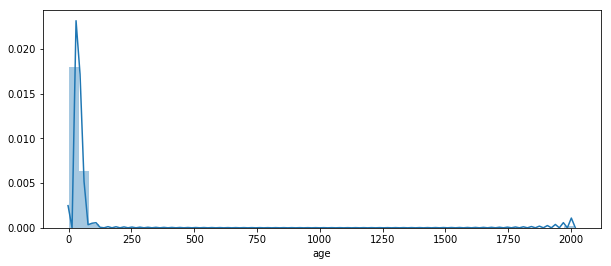

In [6]:
#나이에 대한 분포
plt.figure(figsize=(10,4))
sns.distplot(train.loc[train['age'].notnull(),"age"])

위의 분포를 보면 nonsene하다. 250세가 넘는 사람은 없을 뿐더러 아기나 초등학생이 air bnb를 이용한다는 것은 nonsense다.

그러므로 서비스 이용이 가능 할것은 나이로 range을 줄인다. (16 ~ 75)

In [7]:
train.loc[(train['age']<=75)&(train['age']>=16),'age'].describe()

count    122339.000000
mean         36.278202
std          11.104979
min          16.000000
25%          28.000000
50%          33.000000
75%          42.000000
max          75.000000
Name: age, dtype: float64

## 시계열 데이터가 의미하는 것 

In [8]:
# 년, 월, 일 나누기
train["data_created_year"] = train["date_account_created"].dt.year
train["data_created_month"] = train["date_account_created"].dt.month
train["data_created_day"] = train["date_account_created"].dt.day

In [10]:
train['first_active-year'] = train["timestamp_first_active"].dt.year
train['first_active-month'] = train["timestamp_first_active"].dt.month
train['first_active-day'] = train["timestamp_first_active"].dt.day

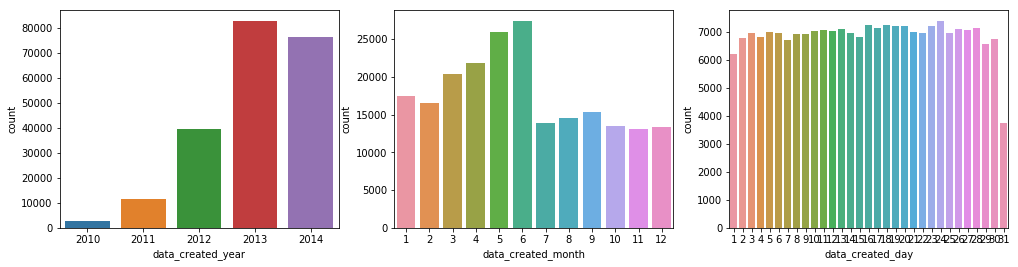

In [11]:
figure, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3)
figure.set_size_inches(17,4)
sns.countplot(train["data_created_year"],ax=ax1)
sns.countplot(train["data_created_month"],ax=ax2)
sns.countplot(train["data_created_day"],ax=ax3)

- 년도별로 보았을때 2012년부터 폭팔적으로 유저가 수가 늪어난 것을 알 수 있다. 2014년도가 2013년도 보다 낮다. 하락세인가?

- 월별 그래프에서는 1 ~ 6월 까지 성장세를 보이다가 7 ~ 12월은 전보다 유저 가입수가 낮다. 어떤 이유인지 조사해 볼 필요가 있다.

- 일별 그래프에서는 특볗한 패턴이 없다. 마지막 31일 낮은 것은 월마다 31일이 없기 때문이라고 추정할 수 있다.

In [12]:
#년-월 데이터 생성
train['data_created_year-month'] = train["data_created_year"].astype('str') +'-' + train['data_created_month'].astype('str')

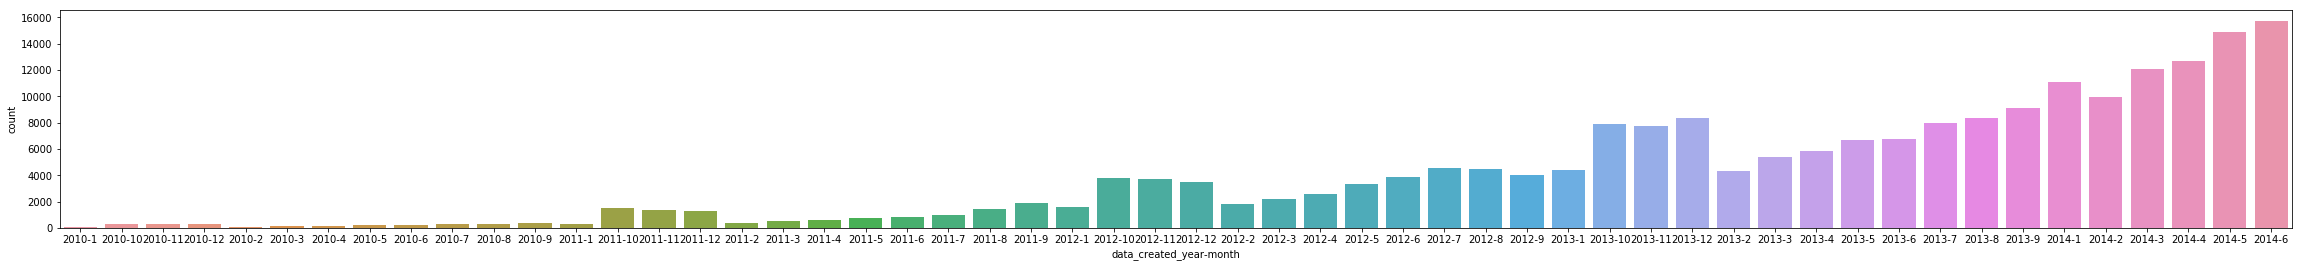

In [13]:
plt.figure(figsize=(40,4))
sns.countplot(train["data_created_year-month"].sort_values())

Air BnB는 꾸준히 성장세이다. 2014년도 총 유저 가입자수가 작은 것은 데이터가 6월까지 만 있기 때문

_________________________________________________

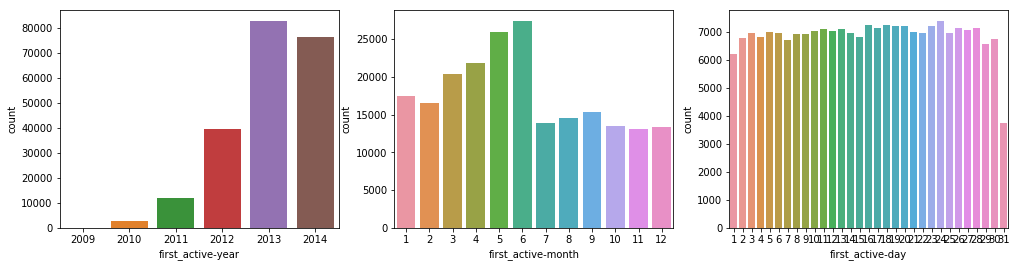

In [14]:

figure, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3)
figure.set_size_inches(17,4)
sns.countplot(train["first_active-year"],ax=ax1)
sns.countplot(train["first_active-month"],ax=ax2)
sns.countplot(train["first_active-day"],ax=ax3)

Acitve 데이터도 Created 데이터와 비슷한 양상을 보인다.

_______________________________________________________________

유저들이 ID를 생성하는데까지 걸리는 평균시간은?

[]

In [24]:
# creat 데이터와 active 데이터 초 데이터 바꾸기
t_list=[]
def differene_time(a,b,c):
    for i in range(len(train)):
        dt = datetime.datetime(a[i],b[i],c[i])
        s = time.mktime(dt.timetuple())
        t_list.append(s)

In [26]:
t_list_2=[]
def differene_time(a,b,c):
    for i in range(len(train)):
        dt = datetime.datetime(a[i],b[i],c[i])
        s = time.mktime(dt.timetuple())
        t_list_2.append(s)

In [25]:
differene_time(train["data_created_year"],train["data_created_month"],train["data_created_day"])

In [27]:
differene_time(train["first_active-year"],train["first_active-month"],train["first_active-day"])

In [28]:
diff_active_created = []
for i in range(len(t_list)):
    s = t_list[i] - t_list_2[i]
    diff_active_created.append(s)

In [30]:
train['diff_active_created']= diff_active_created

In [31]:
# second 를 day로 바꾸기
train['diff_active_created'] = train["diff_active_created"] / 86400

In [32]:
len(train[train["diff_active_created"] >0])

178

 213451명의 유저 중 178명은 바로 Air bnb에 가입하지 않았다.

In [33]:
# 기술통계학적 표현
train.loc[train["diff_active_created"] >0,'diff_active_created'].describe()

count     178.000000
mean      277.988764
std       307.431826
min         1.000000
25%        37.000000
50%       165.000000
75%       388.500000
max      1456.000000
Name: diff_active_created, dtype: float64

평균적으로 278일 정도의 간격이 있다.

_________________________________________

아이디 생성 간격이 있는 사람들의 특징은 무엇인가?

In [34]:
diff_over0 = train.loc[train["diff_active_created"] >0,:]

In [35]:
diff_notover0 = train.loc[train["diff_active_created"] ==0,:]

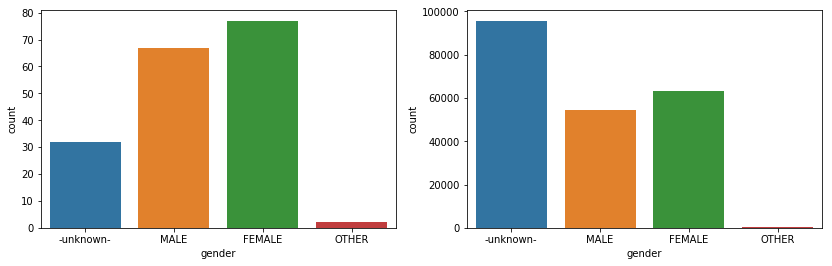

In [36]:
figure, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(14,4)

sns.countplot(diff_over0['gender'],ax=ax1)
sns.countplot(diff_notover0["gender"],ax=ax2,order=['-unknown-','MALE','FEMALE',"OTHER"])


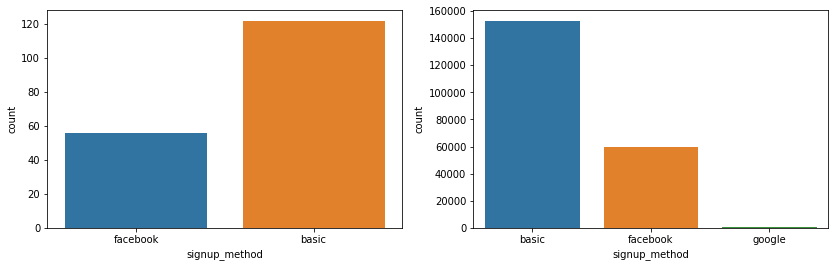

In [37]:
figure, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(14,4)

sns.countplot(diff_over0['signup_method'],ax=ax1)
sns.countplot(diff_notover0["signup_method"],ax=ax2)

가입간격이 있는 사람과 없는 사람을 비교해본 결과 큰패턴은 발견하지 못했다.

평균나이가 4세정도 높은 것 빼고

## AIr BnB 고객들의 특성 

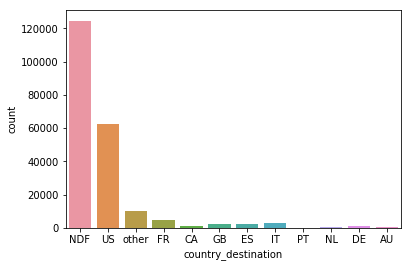

In [40]:
#선호하는 여행지
sns.countplot(train['country_destination'])

NDF(was not booking)이 가장 많다. 즉 booking을 한 사람 중에는 US(미국)을 가장 선호

_______________________________________

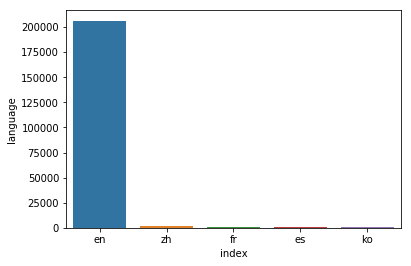

In [50]:
sns.barplot(x=train['language'].value_counts()[0:5].reset_index()['index'], y=train['language'].value_counts()[0:5].reset_index()['language'])

유저가 사용하는 언어 TOP5을 뽑아본 결과 위와 같은 결과가 나왔다. 영어를 사용하는 유저가 압도적으로 많다.

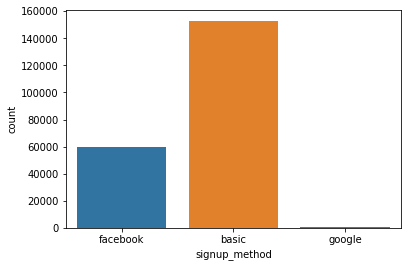

In [54]:
sns.countplot(train['signup_method'])

가입방법으로는 Basic(일반적인 가입)이 1위, Facebook 다음으로 구글 순이다.

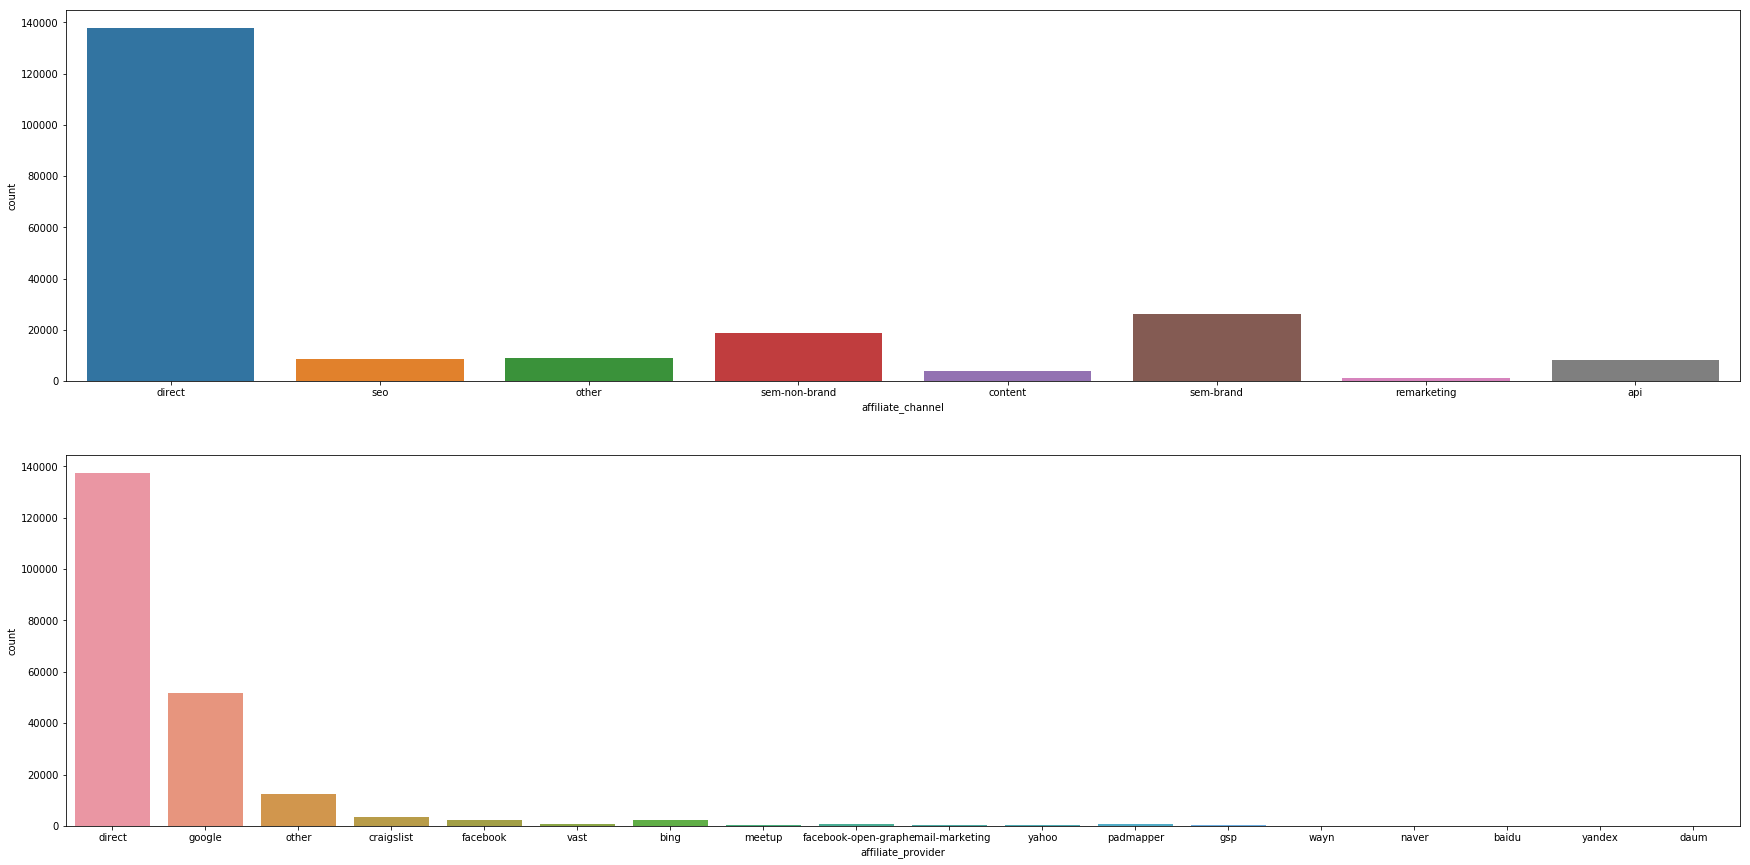

In [63]:
figure, (ax1,ax2) = plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(30,15)
sns.countplot(train['affiliate_channel'],ax=ax1)
sns.countplot(train['affiliate_provider'],ax=ax2)

마케팅 방법으로는 직접마케팅과 검색엔진 마케팅이 주를 이루고 있다. 검색엔진 마케팅 대부분 구글에서 제공했다.

_________________________________________________________________________________________________